In [1]:
import sys
sys.path.append("../Tools/Weston")
sys.path.append("../Tools/David")
import numpy as np
from athena_tools import DataVTK
import matplotlib.pyplot as plt


In [2]:
vtk = DataVTK("Par_Strat3d.0500.dpar.vtk", silent=False)

Scalars: ['dpar']
Vectors: []


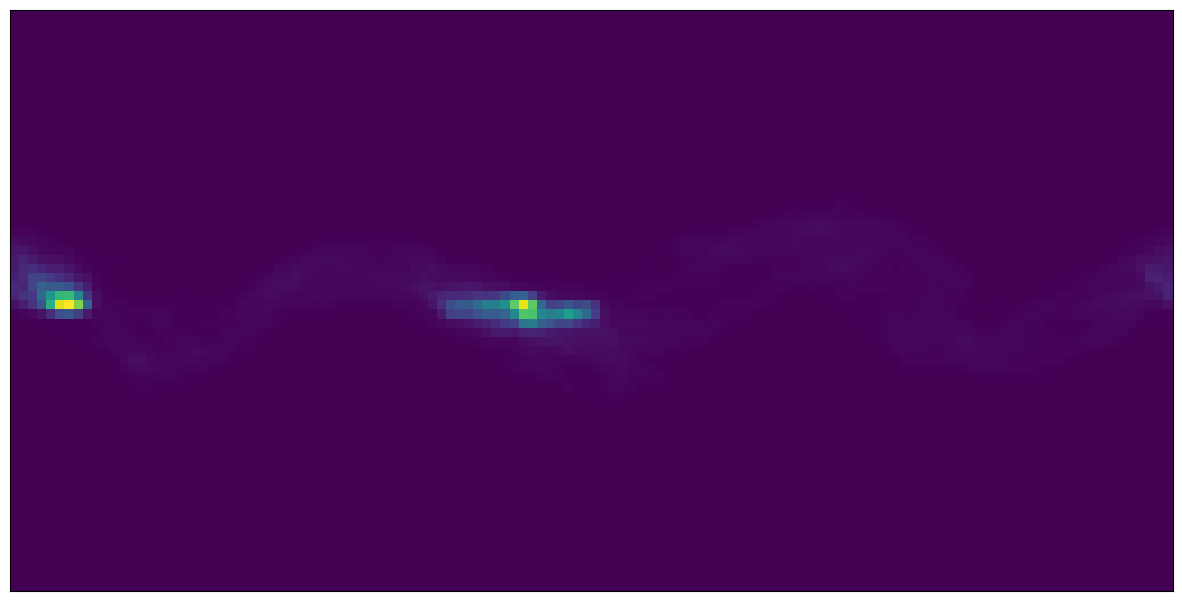

In [3]:
#Original
plt.rcParams['figure.figsize'] = [15, 12]
fig = plt.figure()
ax = plt.gca()
ax.set_facecolor('black')

mesh = plt.pcolormesh(vtk.ccx, vtk.ccz, vtk.data["dpar"].mean(axis=1), shading="auto",
                      cmap="viridis")
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])
#plt.colorbar(mesh,cax=ax)

plt.show()

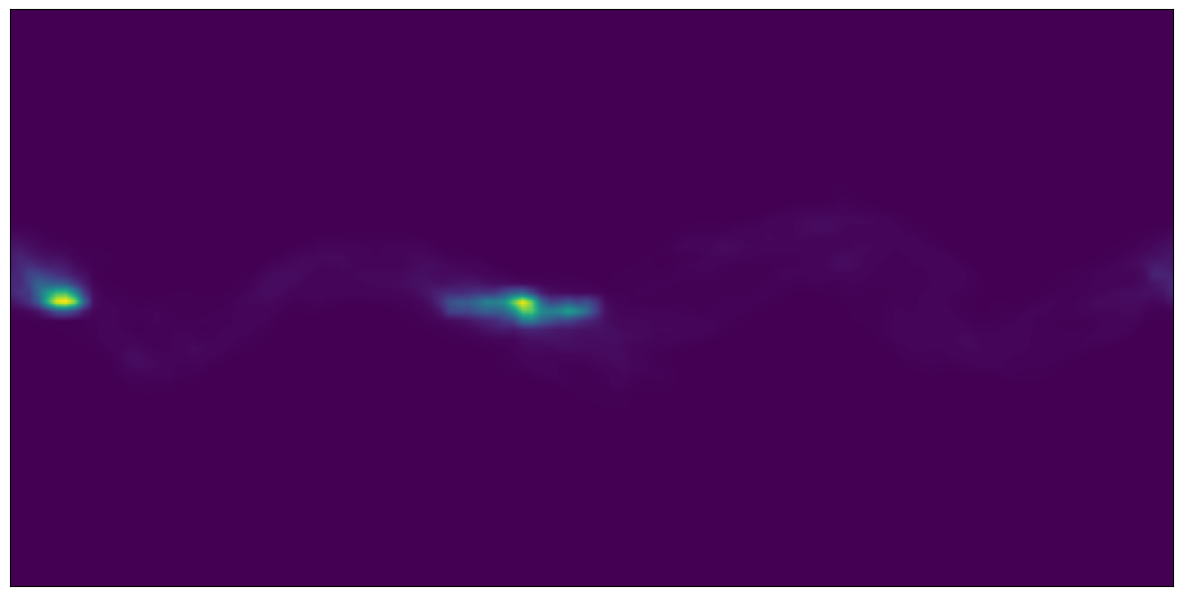

In [4]:
#New
from scipy.interpolate import RegularGridInterpolator

# Coordinates
x = vtk.ccx              # (128,)
z = vtk.ccz              # (64,)

# Density array (nz, nx = 64 × 128)
dens = vtk.data["dpar"].mean(axis=1)

# Transpose to (nx, nz) = (128, 64)
dens = dens.T

# --- Upsampling factor ---
factor = 4   # increase for smoother images

# Fine grid
x_fine = np.linspace(x.min(), x.max(), len(x) * factor)
z_fine = np.linspace(z.min(), z.max(), len(z) * factor)

# Interpolator
interp = RegularGridInterpolator((x, z), dens)

# Interpolate over fine mesh
X_fine, Z_fine = np.meshgrid(x_fine, z_fine, indexing="ij")
pts = np.stack([X_fine.ravel(), Z_fine.ravel()], axis=-1)
dens_fine = interp(pts).reshape(X_fine.shape)

# --- Plot ---
extent = [x_fine.min(), x_fine.max(), z_fine.min(), z_fine.max()]

plt.figure(figsize=(15,12))
plt.gca().set_facecolor("black")

plt.imshow(
    dens_fine.T,
    origin="lower",
    cmap="viridis",
    extent=extent,
    aspect="equal"
)

plt.xticks([])
plt.yticks([])

plt.show()

